# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
service = Service(ChromeDriverManager().install())

In [3]:
browser = Browser('chrome', service=service, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# # https://static.bc-edx.com/data/web/mars_facts/temperature.html
try:
    url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
    browser.visit(url)
except Exception as e:
    print(f"An error occurred: {e}")

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
weather_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = weather_soup.find('table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
weather_data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
        cols = row.find_all('td')
        weather_data.append({
            'id': int(cols[0].get_text()),
            'terrestrial_date': cols[1].get_text(),
            'sol': int(cols[2].get_text()),
            'ls': float(cols[3].get_text()),
            'month': int(cols[4].get_text()),
            'min_temp': float(cols[5].get_text()),
            'pressure': float(cols[6].get_text())
        })

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df = pd.DataFrame(weather_data)

In [9]:
# Confirm DataFrame was created successfully
print(weather_df.head())

   id terrestrial_date  sol     ls  month  min_temp  pressure
0   2       2012-08-16   10  155.0      6     -75.0     739.0
1  13       2012-08-17   11  156.0      6     -76.0     740.0
2  24       2012-08-18   12  156.0      6     -76.0     741.0
3  35       2012-08-19   13  157.0      6     -74.0     732.0
4  46       2012-08-20   14  157.0      6     -74.0     740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
weather_df = pd.DataFrame(weather_data)

In [11]:
# Change data types for data analysis
weather_df.rename(columns={'terrestrial_date': 'Terrestrial Date'}, inplace=True)

In [12]:
# Confirm type changes were successful by examining data types again
weather_df['Terrestrial Date'] = pd.to_datetime(weather_df['Terrestrial Date'])

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
mars_months = weather_df['month'].nunique()
print(f"Number of months on Mars: {mars_months}")

Number of months on Mars: 12


In [14]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = weather_df['sol'].nunique()
print(f"Number of Martian days in the dataset: {martian_days}")

Number of Martian days in the dataset: 1867


In [15]:
# 3. What is the average minimum temperature by month?
average_min_temp = weather_df.groupby('month')['min_temp'].mean()
print(f"Average Minimum Temperature by Month: {average_min_temp}")

Average Minimum Temperature by Month: month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


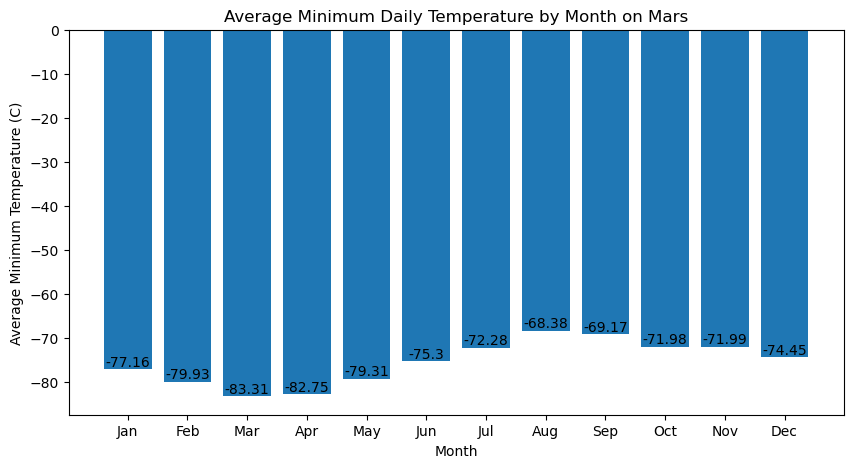

In [16]:
# Plot the average minimum temperature by month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 5))
bars = plt.bar(average_min_temp.index, average_min_temp, tick_label=month_names)
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (C)')
plt.title('Average Minimum Daily Temperature by Month on Mars')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')  # ha: horizontal alignment, va: vertical alignment

plt.show()

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = average_min_temp.idxmin()
warmest_month = average_min_temp.idxmax()
print(f"Coldest month on Mars: Month {coldest_month}")
print(f"Warmest month on Mars: Month {warmest_month}")

Coldest month on Mars: Month 3
Warmest month on Mars: Month 8


In [18]:
# 4. What is the average pressure by month?
average_pressure = weather_df.groupby('month')['pressure'].mean()

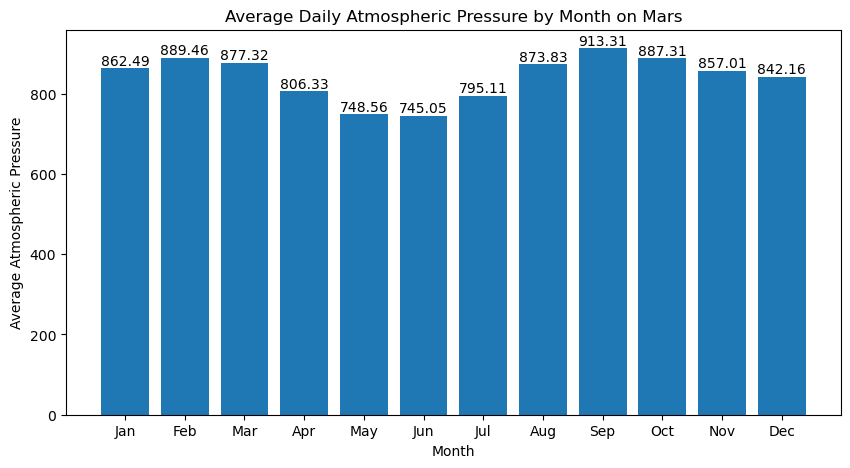

In [19]:
# Plot the average pressure by month
plt.figure(figsize=(10, 5))
bars = plt.bar(average_pressure.index, average_pressure, tick_label=month_names)
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Daily Atmospheric Pressure by Month on Mars')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')  # ha: horizontal alignment, va: vertical alignment

plt.show()

In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = average_pressure.idxmin()
highest_pressure_month = average_pressure.idxmax()
print(f"Month with the lowest atmospheric pressure: Month {lowest_pressure_month}")
print(f"Month with the highest atmospheric pressure: Month {highest_pressure_month}")

Month with the lowest atmospheric pressure: Month 6
Month with the highest atmospheric pressure: Month 9


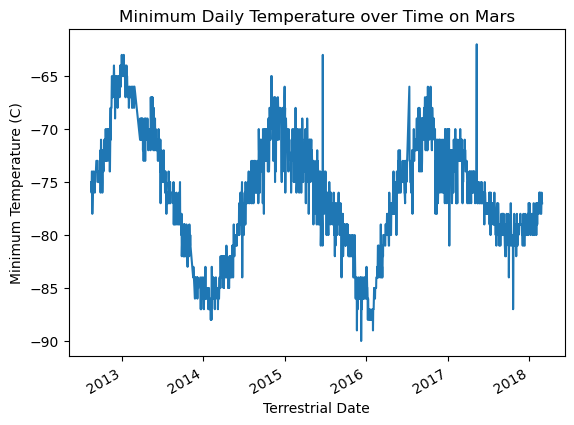

In [21]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
weather_df.set_index('Terrestrial Date', inplace=True)
min_temp_plot = weather_df['min_temp'].plot()
min_temp_plot.set_ylabel('Minimum Temperature (C)')
plt.title('Minimum Daily Temperature over Time on Mars')
plt.show()

#### Minimum Temperature

March = Lowest Temp.  
August = Highest Temp.  

#### Atmospheric Pressure
June = Lowest Atmo Pres.  
Sept = Highest Atmo Pres.  

#### Year Length
1867 Terrestrial days in a Martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
weather_df.to_csv('mars_weather.csv', index=False)

In [23]:
browser.quit()